In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

C:\Users\Sathya Sai\AppData\Local\Temp\ipykernel_15888\3397335393.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [396]:
books['Image-URL-M'][1] # M -------> Medium size image of book

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [5]:
books.sample(n=1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
90092,0440228123,Sunshine Rider: The First Vegetarian Western (...,Ric Lynden Hardman,1999,Laurel Leaf Library,http://images.amazon.com/images/P/0440228123.0...,http://images.amazon.com/images/P/0440228123.0...,http://images.amazon.com/images/P/0440228123.0...


In [6]:
users.sample(n=1)

,User-ID,Location,Age
16334,16335,"toronto, ontario, canada",26.0


In [7]:
ratings.sample(n=1)

,User-ID,ISBN,Book-Rating
641060,154788,0451455509,6


In [8]:
print("Shape of Users = {}".format(users.shape))
print("Shape of Books = {}".format(books.shape))
print("Shape of Ratings = {}".format(ratings.shape))

Shape of Users = (278858, 3)
Shape of Books = (271360, 8)
Shape of Ratings = (1149780, 3)


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isna().sum() #Age is not important in our model

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
(~ratings.notna()).sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [168]:
books["Year-Of-Publication"].value_counts().index[pd.to_numeric(books["Year-Of-Publication"].value_counts().index,errors='coerce',downcast='integer').isna()]#[(pd.to_numeric(books["Year-Of-Publication"].value_counts(),errors='coerce').isnull())]

Index(['DK Publishing Inc', 'Gallimard'], dtype='object')

In [169]:
books["Year-Of-Publication"].value_counts()[(books["Year-Of-Publication"].value_counts().index == 'Gallimard') | (books["Year-Of-Publication"].value_counts().index == 'DK Publishing Inc')]#in ['DK Publishing Inc','Gallimard']

DK Publishing Inc    2
Gallimard            1
Name: Year-Of-Publication, dtype: int64

In [170]:
books["Year-Of-Publication"]=(pd.to_numeric(books["Year-Of-Publication"],errors='coerce',downcast='integer'))

In [172]:
# Data is missing at Random
books.dropna(axis=0,inplace=True)

In [173]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].astype(int)

In [174]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [208]:
books.duplicated().sum()

0

In [207]:
ratings.duplicated().sum()

0

In [209]:
users.duplicated().sum()

0

In [175]:
ratings["Book-Rating"].value_counts().sort_index(ascending=True)

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: Book-Rating, dtype: int64

In [176]:
books["Year-Of-Publication"].value_counts().sort_index(ascending=False)

2050       2
2038       1
2037       1
2030       7
2026       1
        ... 
1897       1
1806       1
1378       1
1376       1
0       4618
Name: Year-Of-Publication, Length: 116, dtype: int64

In [177]:
#Outlier Detection

In [178]:
books["Year-Of-Publication"].value_counts()[books["Year-Of-Publication"].value_counts().index<(pd.Series(books["Year-Of-Publication"].value_counts().index).quantile(0.25))].sort_index()

0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
1923      11
1924       2
1925       2
1926       2
1927       2
1928       2
1929       7
1930      13
1931       3
Name: Year-Of-Publication, dtype: int64

<AxesSubplot:ylabel='Count'>

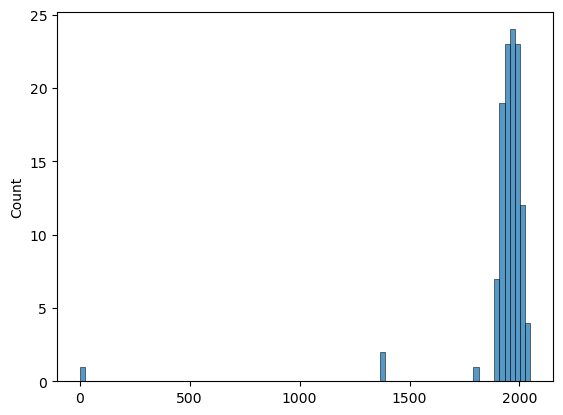

In [179]:
sns.histplot(pd.Series(books["Year-Of-Publication"].value_counts().index))

In [160]:
#Therefore dropping these outliers i.e. using a imputer 

In [180]:
books["Year-Of-Publication"].replace({0:np.NaN},inplace=True)

In [188]:
books.loc[books["Year-Of-Publication"].isna(),"Year-Of-Publication"]=books["Year-Of-Publication"].dropna().sample(n=books["Year-Of-Publication"].isna().sum()).values

In [189]:
books["Year-Of-Publication"].isna().sum()

0

In [ ]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].astype(int)

<AxesSubplot:ylabel='Count'>

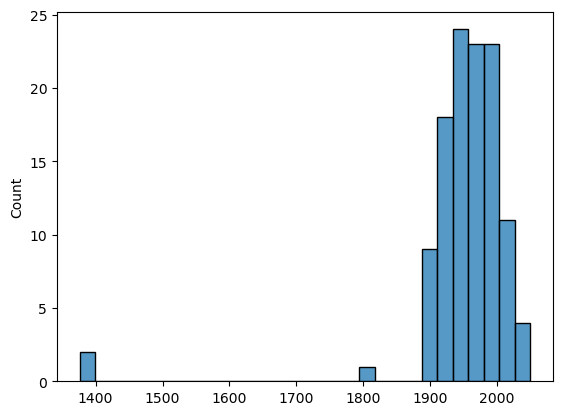

In [210]:
sns.histplot(pd.Series(books["Year-Of-Publication"].value_counts().index))

# POPULARITY BASED RECOMMENDATION

In [392]:
ratings_with_name=ratings.merge(books,on="ISBN")

In [218]:
No_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
No_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
No_rating_df.sample(n=2)

,Book-Title,num_ratings
138459,Paul Gauguin,1
198422,The Moon King,1


In [219]:
mean_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
mean_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
mean_rating_df.sample(n=2)

,Book-Title,avg_rating
100493,Krabat. GroÃ?Â?druck. Roman.,8.0
13693,An Unnatural Order: Uncovering the Roots of Ou...,3.5


In [240]:
lst=np.array(No_rating_df.sort_values(by='num_ratings',ascending=False)['num_ratings'].index)[0:10]

<BarContainer object of 10 artists>

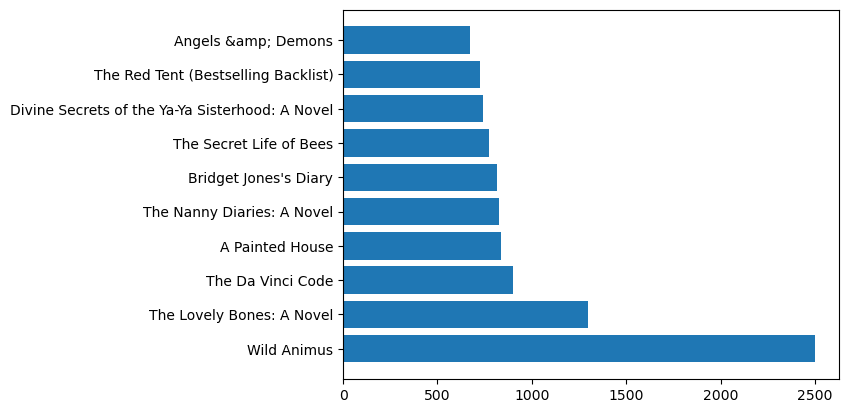

In [241]:
plt.barh(No_rating_df.loc[lst,'Book-Title'],No_rating_df.loc[lst,"num_ratings"])

In [242]:
lst_1=np.array(mean_rating_df.sort_values(by='avg_rating',ascending=False)['avg_rating'].index)[0:10]

<BarContainer object of 10 artists>

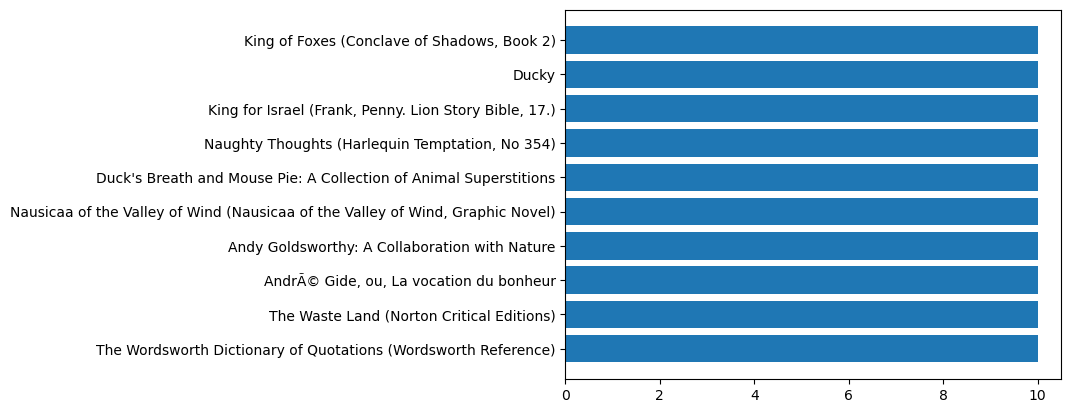

In [243]:
plt.barh(mean_rating_df.loc[lst_1,'Book-Title'],mean_rating_df.loc[lst_1,"avg_rating"])

In [250]:
merged_df_popularity=No_rating_df.merge(mean_rating_df,on='Book-Title')

In [372]:
def find_recommendations():
    mi=0.9991
    ma=0
    for i in range(6):
        mi=np.round(mi,4)
        print("Ratings = {} \nwhere quantile value = {}".format(merged_df_popularity["num_ratings"].quantile(mi),mi))
        no_of_books=len(merged_df_popularity[merged_df_popularity["num_ratings"]>=merged_df_popularity["num_ratings"].quantile(mi)])
        print("Number  of Popular recommendations = {}".format(no_of_books))
        print("\n")
        if(no_of_books>=100):
            ma=mi     
        mi+=0.0001
    print("ma = {}".format(ma))
    ma+=0.00009
    print("\n")
    ans=0
    n_recommendations=0
    rating_val=0
    for i in range(9):
        ma=np.round(ma,5)
        print("Ratings = {} \nwhere quantile value = {}".format(merged_df_popularity["num_ratings"].quantile(ma),ma))
        no_of_recommendations=len(merged_df_popularity[merged_df_popularity["num_ratings"]>=int(merged_df_popularity["num_ratings"].quantile(ma))])
        print("Number  of Popular recommendations = {}".format(no_of_recommendations))
        if(no_of_recommendations<=100):
            n_recommendations=no_of_recommendations
            rating_val=int(merged_df_popularity["num_ratings"].quantile(ma))
            ans=ma
        print("\n")
        ma-=0.00001
        
    return ans,rating_val,n_recommendations    

In [373]:
percentile_val,rating,no_of_recommendations=find_recommendations()

Ratings = 230.0 
where quantile value = 0.9991
Number  of Popular recommendations = 219


Ratings = 247.1479999999865 
where quantile value = 0.9992
Number  of Popular recommendations = 193


Ratings = 262.0 
where quantile value = 0.9993
Number  of Popular recommendations = 170


Ratings = 276.0 
where quantile value = 0.9994
Number  of Popular recommendations = 146


Ratings = 298.46749999999884 
where quantile value = 0.9995
Number  of Popular recommendations = 121


Ratings = 326.57400000002235 
where quantile value = 0.9996
Number  of Popular recommendations = 97


ma = 0.9995


Ratings = 322.65339999995194 
where quantile value = 0.99959
Number  of Popular recommendations = 100


Ratings = 318.7527000000118 
where quantile value = 0.99958
Number  of Popular recommendations = 104


Ratings = 315.36819999990985 
where quantile value = 0.99957
Number  of Popular recommendations = 104


Ratings = 312.0 
where quantile value = 0.99956
Number  of Popular recommendations = 108


Ratings

In [374]:
rating#==int(merged_df_popularity["num_ratings"].quantile(percentile_val))

322

In [388]:
tem=merged_df_popularity[merged_df_popularity["num_ratings"]>=rating].sort_values(by=['avg_rating','num_ratings'],ascending=False)

In [397]:
tem.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating','Image-URL-M']]

,Book-Title,Book-Author,num_ratings,avg_rating,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370,http://images.amazon.com/images/P/0345339703.0...
...,...,...,...,...,...
407,The Pelican Brief,John Grisham,581,2.611015,http://images.amazon.com/images/P/0440214041.0...
410,While I Was Gone,Sue Miller,431,2.580046,http://images.amazon.com/images/P/0345443284.0...
414,The Perfect Storm : A True Story of Men Agains...,Sebastian Junger,404,2.539604,http://images.amazon.com/images/P/0060977477.0...
417,A Map of the World,Jane Hamilton,327,2.492355,http://images.amazon.com/images/P/0385500769.0...


In [629]:
popular_df=tem.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating','Image-URL-M']]

In [386]:
# COLLABORATIVE FILTERING

In [462]:
q_val=0.988
dictionary={}
for i in range(10):
    num_users=int(ratings_with_name.groupby('User-ID').count().rename(columns={'Book-Rating':"count"})['count'].quantile(q_val))
    if(((num_users>=150)&(num_users<=250))):
        dictionary[q_val]=num_users
    q_val+=0.001

In [476]:
lst_3=[]
for i,j in dictionary.items():
    t=ratings_with_name.groupby('User-ID').count()['Book-Rating']>=j
    #print(j)
    #print(len(t[t]))
    lst_3.append(len(t[t]))
print(lst_3)

[1110, 1018, 923, 830, 738, 647]


In [490]:
np.ceil(np.mean(list(dictionary.values())))

193.0

In [521]:
def good_readers(df,review_count):
    x=df.groupby('User-ID').count().rename(columns={'Book-Rating':'count'})['count']>=review_count
    print("Number of good book readers i.e who atleast gave {} reviews = {}".format(review_count,len(x[x])))
    return x[x].index

In [522]:
x=good_readers(ratings_with_name,193)

Number of good book readers i.e who atleast gave 193 reviews = 848


In [523]:
x_1=good_readers(ratings_with_name,197)

Number of good book readers i.e who atleast gave 197 reviews = 830


In [524]:
x_2=good_readers(ratings_with_name,200)

Number of good book readers i.e who atleast gave 200 reviews = 816


In [528]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(x_2)]

In [529]:
filtered_rating_1=ratings_with_name[ratings_with_name['User-ID'].isin(x_1)]

In [531]:
filtered_rating_2=ratings_with_name[ratings_with_name['User-ID'].isin(x)]

In [579]:
def min_reviews_per_book(df):
    score_dict={}
    s_val=0.995
    for i in range(10): # Minimum No Of Ratings Per Book
        s_val=np.round(s_val,4)
        num=df.groupby('Book-Title').count().rename(columns={'Book-Rating':"count"})['count'].quantile(s_val)
        score_dict[s_val]=np.ceil(num)
        s_val+=0.0001
    score_lst=[]
    for i,j in score_dict.items(): #Number Of Such Books
        y=df.groupby('Book-Title').count().rename(columns={'Book-Rating':"count"})['count']>j
        #print(j)
        #print(len(y[y]))
        score_lst.append(len(y[y]))
    print(score_lst)
    print("\n")
    print("Average Number of Books =",end=" ")
    print(np.mean(score_lst))
    return score_dict,score_lst

In [589]:
d,l=min_reviews_per_book(filtered_rating_2) # ------->[User-Id]= x
print(d)
print("\n")
val=np.ceil(np.mean(list(d.values()))) #
print("Minimum Number of reviews per Book = {}".format(val))

[762, 762, 729, 729, 705, 705, 683, 653, 653, 627]


Average Number of Books = 700.8
{0.995: 48.0, 0.9951: 48.0, 0.9952: 49.0, 0.9953: 49.0, 0.9954: 50.0, 0.9955: 50.0, 0.9956: 51.0, 0.9957: 52.0, 0.9958: 52.0, 0.9959: 53.0}


Minimum Number of reviews per Book = 51.0


In [586]:
#d_1,l_1=min_reviews_per_book(filtered_rating_1)
#print(d_1)
#print("Minimum Number of reviews per Book = {}".format(np.ceil(np.mean(list(d_1.values())))))

#[747, 747, 747, 714, 714, 693, 668, 668, 643, 617]

#Average Number of Books = 695.8
#{0.995: 48.0, 0.9951: 48.0, 0.9952: 48.0, 0.9953: 49.0, 0.9954: 49.0, 0.9955: 50.0, 0.9956: 51.0, 0.9957: 51.0, 0.9958: 52.0, 0.9959: 53.0}
#Minimum Number of reviews per Book = 50.0

In [587]:
#d_2,l_2=min_reviews_per_book(filtered_rating)
#print(d_2)
#print("Minimum Number of reviews per Book = {}".format(np.ceil(np.mean(list(d_2.values())))))

#[773, 736, 736, 707, 707, 683, 683, 660, 637, 637]

#Average Number of Books = 695.9
#{0.995: 47.0, 0.9951: 48.0, 0.9952: 48.0, 0.9953: 49.0, 0.9954: 49.0, 0.9955: 50.0, 0.9956: 50.0, 0.9957: 51.0, 0.9958: 52.0, 0.9959: 52.0}
#Minimum Number of reviews per Book = 50.0

In [602]:
def famous_books_list(df,value):
    y=df.groupby('Book-Title').count().rename(columns={'Book-Rating':'count'})['count']>value
    print("Number Of Books having Atleast {} Reviews per Book = {} ".format(int(value),len(y[y])))
    return y[y].index

In [603]:
famous_books=famous_books_list(filtered_rating_2,val)

Number Of Books having Atleast 51 Reviews per Book = 683 


In [604]:
final_ratings=filtered_rating_2[filtered_rating_2['Book-Title'].isin(famous_books)]

In [605]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986.0,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995.0,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993.0,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1030356,274808,0449701913,0,Homecoming,Cynthia Voigt,1983.0,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...


In [610]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [611]:
pt.fillna(0,inplace=True)

In [612]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,274004,274061,274301,274308,274808,275970,277427,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [614]:
from sklearn.metrics.pairwise import cosine_similarity

In [616]:
similarity_scores=cosine_similarity(pt)

In [618]:
similarity_scores.shape

(683, 683)

In [639]:
def recommend_book(book_name):
    book_index=np.where(pt.index==book_name)[0][0] #------------>returning a 2-D array
    distances=similarity_scores[book_index]
    similar_books=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    
    data=[]
    for i in similar_books:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Book-Title"].values)) 
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Book-Author"].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')["Image-URL-M"].values))
        
        data.append(item)
        
    return data

In [640]:
recommend_book("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141

In [630]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [641]:
pickle.dump(pt,open('pt.pkl','wb'))

In [645]:
pickle.dump(books,open('books.pkl','wb'))

In [643]:
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [644]:
books['Image-URL-M'] = books['Image-URL-M'].str.replace('http://', 'https://') #( books is the dataframe name)

# COLLABORATIVE FILTERING USING CLUSTERING

In [ ]:
#import pickle

In [ ]:
#new_pt=pickle.load(open('pt.pkl','rb'))

In [3]:
#from scipy.sparse import csr_matrix

In [5]:
#book_sparse=csr_matrix(new_pt)

In [6]:
#book_sparse

<683x847 sparse matrix of type '<class 'numpy.float64'>'
	with 14399 stored elements in Compressed Sparse Row format>

In [149]:
#from sklearn.neighbors import NearestNeighbors

In [164]:
#tt=[] #cannot use tree with sparse input: using brute force
#n_array=np.array(np.arange(3,11,1))
#for i in n_array:
#    model=NearestNeighbors(algorithm='brute',n_neighbors=i)
#    model.fit(book_sparse)
#   distances,suggestions=model.kneighbors(new_pt.iloc[237,:].values.reshape(1,-1),n_neighbors=i)
#    tt.append(distances.mean())
#    print("{} neighbors = {}".format(i,distances.mean()))

3 neighbors = 23.93474447942478
4 neighbors = 27.104268179079988
5 neighbors = 29.08341454326399
6 neighbors = 30.43933658403547
7 neighbors = 31.51002471157059
8 neighbors = 32.34260529362234
9 neighbors = 33.02928476861057
10 neighbors = 33.58770320701108


In [165]:
#np.mean(tt) #---------> 6 neighbors is performing better.

30.12892272082735

In [166]:
#distances,suggestions=model.kneighbors(new_pt.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [167]:
#distances

array([[ 0.        , 35.70714214, 36.0970913 , 36.61283928, 37.        ,
        37.21894679]])

In [168]:
#suggestions

array([[237, 170, 139, 494, 347,  17]], dtype=int64)

In [169]:
#np.where(new_pt.index=='Deck the Halls (Holiday Classics)')[0][0]

139

In [170]:
#def recommend_by_clustering(book_name): #suggestions is 2-D array ----->suggestions[0] gives the array of indices
#    book_id=np.where(new_pt.index==book_name)[0][0]
#    distances,suggestions=model.kneighbors(new_pt.iloc[book_id,:].values.reshape(1,-1),n_neighbors=7)
#    lst=[]
#    for i in suggestions[0]:
#        #print(new_pt.index[i])
#        lst.append(new_pt.index[i])
#    return lst

In [171]:
#recommend_by_clustering('Holes (Yearling Newbery)')

['Holes (Yearling Newbery)',
 'Exclusive',
 'Deck the Halls (Holiday Classics)',
 'The Cradle Will Fall',
 'No Safe Place',
 'A Patchwork Planet',
 'Long After Midnight']